<a href="https://colab.research.google.com/github/yaj0212/Introductory-Machine-Learning/blob/main/demos/covid-trends/covid-trends-revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The New York Times Covid-19 Database

The New York Times Covid-19 Database is
a county-level database of confirmed cases and deaths,
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily.

These data have fueled many articles and graphics by The Times; these are updated regularly at
[https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).
The Times has created many visualizations that are effective communications of important information about the pandemic.

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this illustration we will only use
the data aggregated at the state level.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips', axis=1)
covid_table.tail(20)

,date,state,cases,deaths
61922,2023-03-23,North Dakota,288106,2529
61923,2023-03-23,Northern Mariana Islands,13395,41
61924,2023-03-23,Ohio,3415254,42061
61925,2023-03-23,Oklahoma,1295832,16549
61926,2023-03-23,Oregon,967156,9451
61927,2023-03-23,Pennsylvania,3539135,50701
61928,2023-03-23,Puerto Rico,1139243,5848
61929,2023-03-23,Rhode Island,461788,3915
61930,2023-03-23,South Carolina,1840458,20192
61931,2023-03-23,South Dakota,280525,3222


### Process the recent data

Here is some code that creates a Table with the recent Covid-19 statistics for a given state. Just pass in the name of the state as a string.


In [ ]:
merged_data = covid_table.drop('state', axis=1)
merged_data = merged_data.groupby('date').sum()
merged_data.tail(20)

,cases,deaths
date,,
2023-03-04,103366460,1129434
2023-03-05,103368027,1129434
2023-03-06,103382801,1129530
2023-03-07,103406609,1129852
2023-03-08,103469981,1130471
2023-03-09,103525528,1131912
2023-03-10,103535689,1131963
2023-03-11,103537178,1131969
2023-03-12,103538183,1131968


In [ ]:
new_cases = np.diff(merged_data['cases'])

# compute 7-day average
avg_cases = np.zeros(7)
for i in np.arange(7, len(new_cases)):
    avg_cases = np.append(avg_cases, np.mean(new_cases[(i-6):i+1]))

dates = np.array(merged_data['cases'].index)[1:]
data = np.array([new_cases, avg_cases]).T
cvd19 = pd.DataFrame(data, columns = ['new cases', '7-day avg'], index=dates)
cvd19.tail(10)

,new cases,7-day avg
2023-03-14,20174.0,23551.857143
2023-03-15,137629.0,34160.000000
2023-03-16,54460.0,34004.714286
2023-03-17,18756.0,35232.571429
2023-03-18,1175.0,35187.714286
2023-03-19,1424.0,35247.571429
2023-03-20,9787.0,34772.142857
2023-03-21,18373.0,34514.857143
2023-03-22,51812.0,22255.285714
2023-03-23,45146.0,20924.714286


In [ ]:
cvd19.describe()

,new cases,7-day avg
count,1.157000e+03,1157.000000
mean,8.980988e+04,89731.251266
std,1.280882e+05,112755.063112
min,-2.399900e+04,0.000000
25%,2.465300e+04,35477.857143
50%,5.427800e+04,60434.285714
75%,1.164930e+05,107428.428571
max,1.433977e+06,806927.857143


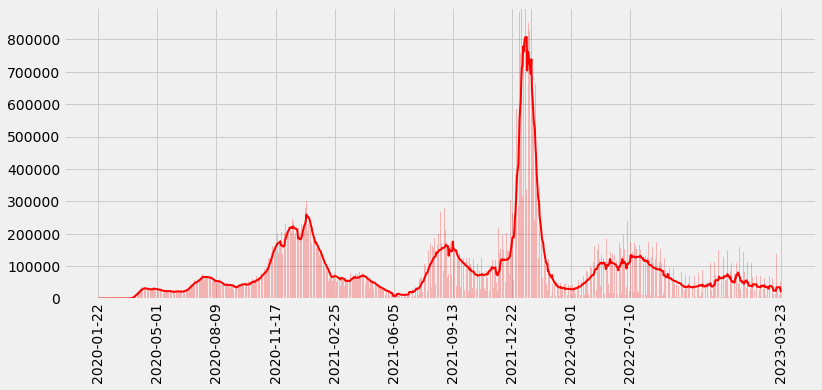

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(cvd19.index, cvd19['new cases'], color='red', alpha=.25)
plt.plot(cvd19.index, cvd19['7-day avg'], color='red', linewidth=2)
plt.xlabel('')
_ = plt.xticks(cvd19.index[list(np.arange(0, 1000, 100)) + [len(dates)-1]], rotation=90)
_ = plt.yticks(np.arange(0, 800001, 100000))
_ = plt.ylim(0, 900000)

Compare this to the graph here: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).


Let's now take the data going back to early April


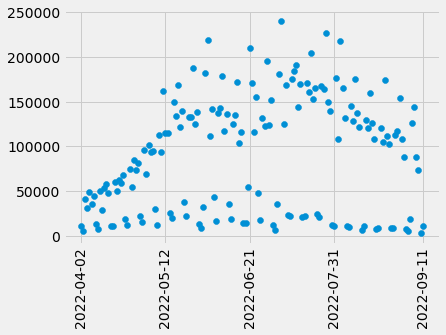

In [ ]:
recent = cvd19[(cvd19.index > '2022-04-01') & (cvd19.index < '2022-09-12')]
y = recent['new cases']
dates = recent.index
plt.scatter(dates, y)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)

Now let's remove the data on the weekends

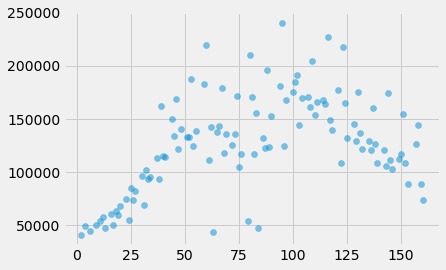

In [ ]:
y = np.array(y)
x = np.arange(len(y))
dates = np.array(dates)
is_weekday = (y > 40000)
plt.scatter(x[is_weekday], y[is_weekday], alpha=.5)


Next, fit a linear regression to the data

In [ ]:
import statsmodels.api as sm
x_week = x[is_weekday]
y_week = y[is_weekday]
X = sm.add_constant(x_week)
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1]]

Finally, plot the results

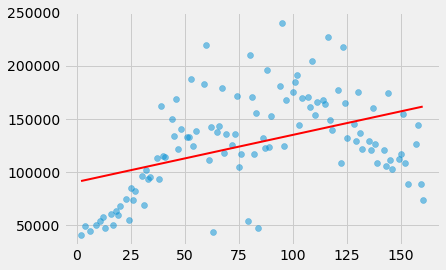

In [ ]:
plt.scatter(x_week, y_week, alpha=.5)
_ = plt.plot(x_week, beta[0] + beta[1]*x_week, color='red', linewidth=2)

Let's now fit a quadratic model by just adding a variable $x^2$

In [ ]:
X = sm.add_constant(x_week)
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1]]

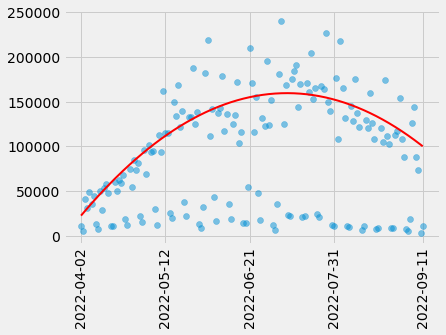

In [ ]:
# form an array with 1, x, x^2

x_week = x[is_weekday]
y_week = y[is_weekday]
X = np.array([np.ones(len(x_week)), x_week, x_week**2])
X = X.T

# fit a linear model
model = sm.OLS(y_week, X)
result = model.fit()
beta = [result.params[0], result.params[1], result.params[2]]

# plot the result
plt.scatter(dates, y, alpha=.5)
plt.plot(x, beta[0] + beta[1]*x + beta[2]*x**2, color='red', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)


A much better fit! The take-away: By removing "outliers" and adding "features" of the original data, we can get more accurate fits to the data.

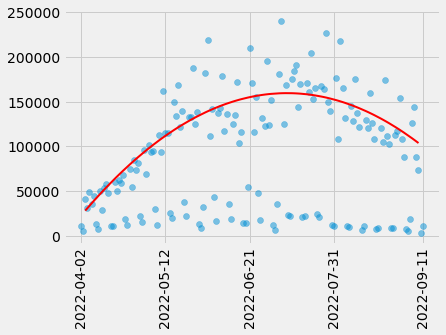

In [ ]:
# Here is the same thing but using "matrix/vector thinking" with numpy

beta = np.array([result.params[0], result.params[1], result.params[2]])
yhat = np.dot(X, beta)

# plot the result
plt.scatter(dates, y, alpha=.5)
plt.plot(X[:,1], yhat, color='red', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)

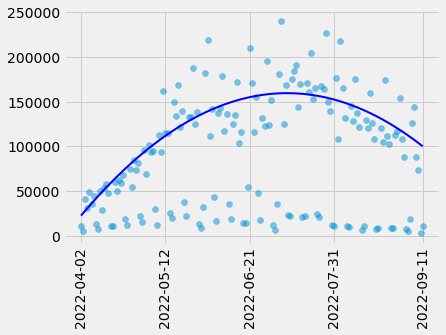

In [ ]:
from scipy.optimize import minimize

def covid19_quadratic_rmse(beta):
    x = x_week
    y = y_week
    estimate = beta[0] + beta[1]*x + beta[2]*(x**2)
    return np.sum((y - estimate) ** 2) # ** 0.5

opt = minimize(covid19_quadratic_rmse, x0=[.1, .2, .3])
beta_new = opt.x

plt.scatter(dates, y, alpha=.5)
plt.plot(x, beta_new[0] + beta_new[1]*x + beta_new[2]*x**2, color='blue', linewidth=2)
_ = plt.xticks(dates[[0, 40, 80, 120, len(dates)-1]], rotation=90)


The take-away here: We can fit the model by numerically optimizing the least squares fit, with minimal math! This is what many machine learning methods do.